# Metadata

```
Name: Maureen O'Shea (mo2cr@virginia.edu)
Course: DS5001
Date: 06 May 2022

Topic:   Pipeline for LIB, TOKEN, VOCAB and CORPUS 

Description: Import a collection of texts and convert to F2. Then we annotate the collection to create an F3-level model.  Created LIB, TOKEN, VOCAB and CORPUS tables.

Original Code Author:  R.C. Alvarado, Module 04 Lab, NLP and the Pipeline
```

# Set Up

In [4]:
data_home = "./data"
data_prefix = "folger"

In [5]:
OHCO = ['play_code', 'act_num', 'scene_num', 'speech_id', 'speaker','line_num']

In [6]:
import pandas as pd
import numpy as np
from glob import glob
import re
import nltk
import seaborn as sns; sns.set()
import plotly_express as px
%matplotlib inline

# Get Data

In [7]:
TOKEN = pd.read_csv(f'{data_home}/{data_prefix}-TOKEN.csv', low_memory=False).set_index(OHCO).dropna()
LIB = pd.read_csv(f'{data_home}/{data_prefix}-LIB.csv').set_index('play_code').dropna()

# Register `TOKEN` table  
* 1. remove '#' from `speaker` and `pos`
* 2. add `term_str`
* 3. remove 4 rows with null values
* 3. add `token_num`

In [8]:
TOKEN

token_str   lemma  \
play_code act_num scene_num speech_id speaker   line_num                     
Lr        1       1         sp-0034   #Lear     34          Attend  attend   
                                                34             the     the   
                                                34           lords    lord   
                                                34              of      of   
                                                34          France  France   
...                                                            ...     ...   
Shr       5       2         sp-2731   #Lucentio 206            she     she   
                                                206           will    will   
                                                206             be      be   
                                                206          tamed    tame   
                                                206             so      so   

                                                             pos  
play_code act_num scene_num speech_id speaker   line_num          
Lr        1       1         sp-0034   #Lear     34          #vvb  
                                                34            #d  
                                                34           #n2  
                                                34        #acp-p  
                                                34        #n1-nn  
...                                                          ...  
Shr       5       2         sp-2731   #Lucentio 206         #pns  
                                                206         #vmb  
                                                206         #vvi  
                                                206         #vvn  
                                                206          #av  

[593351 rows x 3 columns]

### remove '#' from `speaker` and `pos`

In [9]:
# remove '#' from 'speaker' and 'pos'
TOKEN = TOKEN.reset_index()
TOKEN['speaker'] = TOKEN.speaker.replace(r'[#]', '', regex=True).str.lower()
TOKEN['speech_id'] = TOKEN.speech_id.replace(r'[sp-]', '', regex=True)
TOKEN['pos'] = TOKEN.pos.replace(r'[#]', '', regex=True)

### add `term_str` to TOKEN 

In [10]:
# add term_str to TOKEN
TOKEN['term_str'] = TOKEN.token_str.replace(r'[\W_]+', '', regex=True).str.lower()
TOKEN = TOKEN.set_index(OHCO)

In [11]:
#TOKEN #.sort_index()

### Remove 4 rows with null values

In [12]:
TOKEN = TOKEN.sort_index().reset_index()
index_names = TOKEN[TOKEN["speaker"] == 'claudius_ham'].index 
TOKEN = TOKEN.drop(index_names)
TOKEN = TOKEN.set_index(OHCO)

In [13]:
TOKEN

token_str     lemma  \
play_code act_num scene_num speech_id speaker    line_num                       
1H4       1       1         0001      henryiv    1               So        so   
                                                 1           shaken     shake   
                                                 1               as        as   
                                                 1               we        we   
                                                 1              are        be   
...                                                             ...       ...   
Wiv       5       5         2908      masterford 254          shall     shall   
                                                 254            lie       lie   
                                                 254           with      with   
                                                 254       Mistress  mistress   
                                                 254           Ford      Ford   

                                                              pos  term_str  
play_code act_num scene_num speech_id speaker    line_num                    
1H4       1       1         0001      henryiv    1             av        so  
                                                 1            vvn    shaken  
                                                 1         acp-cs        as  
                                                 1            pns        we  
                                                 1            vvb       are  
...                                                           ...       ...  
Wiv       5       5         2908      masterford 254          vmb     shall  
                                                 254          vvi       lie  
                                                 254        acp-p      with  
                                                 254           n1  mistress  
                                                 254        n1-nn      ford  

[593347 rows x 4 columns]

## Write `TOKEN` to `CORPUS`

In [14]:
CORPUS = TOKEN.copy()

In [15]:
CORPUS

token_str     lemma  \
play_code act_num scene_num speech_id speaker    line_num                       
1H4       1       1         0001      henryiv    1               So        so   
                                                 1           shaken     shake   
                                                 1               as        as   
                                                 1               we        we   
                                                 1              are        be   
...                                                             ...       ...   
Wiv       5       5         2908      masterford 254          shall     shall   
                                                 254            lie       lie   
                                                 254           with      with   
                                                 254       Mistress  mistress   
                                                 254           Ford      Ford   

                                                              pos  term_str  
play_code act_num scene_num speech_id speaker    line_num                    
1H4       1       1         0001      henryiv    1             av        so  
                                                 1            vvn    shaken  
                                                 1         acp-cs        as  
                                                 1            pns        we  
                                                 1            vvb       are  
...                                                           ...       ...  
Wiv       5       5         2908      masterford 254          vmb     shall  
                                                 254          vvi       lie  
                                                 254        acp-p      with  
                                                 254           n1  mistress  
                                                 254        n1-nn      ford  

[593347 rows x 4 columns]

# Create DOC at Sentence Level

In [16]:
def gather_docs(CORPUS, ohco_level, term_col='term_str'):
    OHCO = CORPUS.index.names
    CORPUS[term_col] = CORPUS[term_col].astype('str')
    DOC = CORPUS.groupby(OHCO[:ohco_level])[term_col].apply(lambda x:' '.join(x)).to_frame('doc_str')
    return DOC

In [17]:
DOC = gather_docs(CORPUS, 6) 

In [18]:
DOC['n_tokens'] = DOC.doc_str.apply(lambda x: len(x.split()))

In [19]:
DOC

doc_str  \
play_code act_num scene_num speech_id speaker      line_num                                                  
1H4       1       1         0001      henryiv      1                  so shaken as we are so wan with care   
                                                   2             find we a time for frighted peace to pant   
                                                   3         and breathe shortwinded accents of new broils   
                                                   4                to be commenced in strands afar remote   
                                                   5             no more the thirsty entrance of this soil   
...                                                                                                    ...   
Wiv       5       5         2903      mistresspage 250          and laugh this sport oer by a country fire   
                                                   251                                    sir john and all   
                            2908      masterford   252                               let it be so sir john   
                                                   253        to master brook you yet shall hold your word   
                                                   254         for he tonight shall lie with mistress ford   

                                                             n_tokens  
play_code act_num scene_num speech_id speaker      line_num            
1H4       1       1         0001      henryiv      1                9  
                                                   2                9  
                                                   3                7  
                                                   4                7  
                                                   5                8  
...                                                               ...  
Wiv       5       5         2903      mistresspage 250              9  
                                                   251              4  
                            2908      masterford   252              6  
                                                   253              9  
                                                   254              8  

[79691 rows x 2 columns]

# Register a library `LIB` with the following metadata about each play:
  * 1. The `play_code`, matching the first level of the index in the `TOKEN` table. (performed in F0)
  * 2. The length of the play (number of tokens).
  * 3. The number of acts in the play.
  * 4. The number of scenes in the play.
  * 5. Compostion year for the play.
  * 6. source file path
  * 7. genre (comedy,tragedy,history,romance)

In [20]:
LIB.head()

,play_id,play_title
play_code,,
AWW,0,All's Well That Ends Well
Ant,1,Antony and Cleopatra
AYL,2,As You Like It
Err,3,The Comedy of Errors
Cor,4,Coriolanus


### Extract some features for LIB
#### The length of the play (number of tokens).

In [21]:
# add length of play (number of tokens)
LIB['play_len'] = TOKEN.groupby('play_code').term_str.count()
LIB['play_len'] = LIB['play_len'].fillna(0).astype(int)

### Extract some features for LIB
#### The length of the play (number of tokens).

In [22]:
LIB.head()

,play_id,play_title,play_len
play_code,,,
AWW,0,All's Well That Ends Well,11552
Ant,1,Antony and Cleopatra,12677
AYL,2,As You Like It,8058
Err,3,The Comedy of Errors,12097
Cor,4,Coriolanus,20666


#### Record the number of acts, scenes and speeches in the play.

In [23]:
# add number of acts 
LIB['n_acts'] = TOKEN.reset_index()[['play_code','act_num']]\
    .drop_duplicates()\
    .groupby('play_code').act_num.count()

LIB['n_acts'] = LIB['n_acts'].fillna(0).astype(int)

In [24]:
# add number of acts and scenes in play
LIB['n_scenes'] = TOKEN.reset_index()[['play_code','act_num','scene_num']]\
    .drop_duplicates()\
    .groupby('play_code').scene_num.count()

LIB['n_scenes'] = LIB['n_scenes'].fillna(0).astype(int)

In [25]:
# add number of acts and scenes in play
LIB['n_speeches'] = TOKEN.reset_index()[['play_code','act_num','scene_num','speech_id']]\
    .drop_duplicates()\
    .groupby('play_code').speech_id.count()

LIB['n_speeches'] = LIB['n_speeches'].fillna(0).astype(int)

In [26]:
LIB.head()

,play_id,play_title,play_len,n_acts,n_scenes,n_speeches
play_code,,,,,,
AWW,0,All's Well That Ends Well,11552,5,22,419
Ant,1,Antony and Cleopatra,12677,5,40,721
AYL,2,As You Like It,8058,5,16,232
Err,3,The Comedy of Errors,12097,5,11,495
Cor,4,Coriolanus,20666,5,28,812


#### Add Compostion year for the play and source_file_path

In [27]:
# add composition year source: https://www.opensourceshakespeare.org/views/plays/plays_date.php
# add source_file_path from source: https://www.folgerdigitaltexts.org
# add genre from source: https://www.folger.edu/shakespeares-works
# create a list of lists, with years for plays
data = [['1602',"All's Well That Ends Well", 'https://www.folgerdigitaltexts.org/AWW', 'comedy'],
 ['1606','Antony and Cleopatra','https://www.folgerdigitaltexts.org/Ant','tragedy'],
 ['1599','As You Like It','https://www.folgerdigitaltexts.org/AYL','comedy'],
 ['1589','The Comedy of Errors', 'https://www.folgerdigitaltexts.org/Err','comedy'],
 ['1607','Coriolanus','https://www.folgerdigitaltexts.org/Cor','tragedy'],
 ['1609','Cymbeline', 'https://www.folgerdigitaltexts.org/Cym','romance'],
 ['1600','Hamlet', 'https://www.folgerdigitaltexts.org/Ham','tragedy'],
 ['1597','Henry IV, Part 1', 'https://www.folgerdigitaltexts.org/1H4','history'],
 ['1597','Henry IV, Part 2','https://www.folgerdigitaltexts.org/2H4','history'],
 ['1598','Henry V','https://www.folgerdigitaltexts.org/H5','history'],
 ['1591','Henry VI, Part 1','https://www.folgerdigitaltexts.org/1H6','history'],
 ['1590','Henry VI, Part 2','https://www.folgerdigitaltexts.org/2H6','history'],
 ['1590','Henry VI, Part 3','https://www.folgerdigitaltexts.org/3H6','history'],
 ['1612','Henry VIII','https://www.folgerdigitaltexts.org/H8','history'],
 ['1599','Julius Caesar','https://www.folgerdigitaltexts.org/JC','tragedy'],
 ['1596','King John','https://www.folgerdigitaltexts.org/Jn','history'],
 ['1605','King Lear','https://www.folgerdigitaltexts.org/Lr','tragedy'],
 ['1594',"Love's Labor's Lost",'https://www.folgerdigitaltexts.org/LLL','comedy'],
 ['1605','Macbeth','https://www.folgerdigitaltexts.org/Mac','tragedy'],
 ['1604','Measure for Measure','https://www.folgerdigitaltexts.org/MM','comedy'],
 ['1596','The Merchant of Venice','https://www.folgerdigitaltexts.org/MV','comedy'],
 ['1600','The Merry Wives of Windsor', 'https://www.folgerdigitaltexts.org/Wiv','comedy'],
 ['1595',"A Midsummer Night's Dream", 'https://www.folgerdigitaltexts.org/MND','comedy'],
 ['1598','Much Ado About Nothing', 'https://www.folgerdigitaltexts.org/Ado','comedy'],
 ['1604','Othello','https://www.folgerdigitaltexts.org/Oth','tragedy'],
 ['1608','Pericles','https://www.folgerdigitaltexts.org/Per','romance'],
 ['1595','Richard II','https://www.folgerdigitaltexts.org/R2','history'],
 ['1592','Richard III','https://www.folgerdigitaltexts.org/R3','history'],
 ['1594','Romeo and Juliet','https://www.folgerdigitaltexts.org/Rom','tragedy'],
 ['1593','The Taming of the Shrew','https://www.folgerdigitaltexts.org/Shr','comedy'],
 ['1611','The Tempest','https://www.folgerdigitaltexts.org/Tmp','romance'],
 ['1607','Timon of Athens','https://www.folgerdigitaltexts.org/Tim','tragedy'],
 ['1593','Titus Andronicus','https://www.folgerdigitaltexts.org/Tit','tragedy'],
 ['1601','Troilus and Cressida','https://www.folgerdigitaltexts.org/Tro','tragedy'],
 ['1599','Twelfth Night','https://www.folgerdigitaltexts.org/TN','comedy'],
 ['1594','Two Gentlemen of Verona','https://www.folgerdigitaltexts.org/TGV','comedy'],
 ['1610',"The Winter's Tale", 'https://www.folgerdigitaltexts.org/WT','romance']]

In [28]:
# Create the pandas DataFrame
YEARS = pd.DataFrame(data, columns = ['year', 'play_title', 'source_file_path','genre'])

In [29]:
LIB = YEARS.set_index('play_title').join(LIB.reset_index().set_index('play_title'))
LIB = LIB.reset_index().set_index('play_code')

In [30]:
# create a label
LIB['label'] = LIB.apply(lambda x: "{} ({}): {}".format(x.year, x.genre[0], x.play_title), 1)

In [31]:
LIB

,play_title,year,source_file_path,genre,play_id,play_len,n_acts,n_scenes,n_speeches,label
play_code,,,,,,,,,,
AWW,All's Well That Ends Well,1602,https://www.folgerdigitaltexts.org/AWW,comedy,0,11552,5,22,419,1602 (c): All's Well That Ends Well
Ant,Antony and Cleopatra,1606,https://www.folgerdigitaltexts.org/Ant,tragedy,1,12677,5,40,721,1606 (t): Antony and Cleopatra
AYL,As You Like It,1599,https://www.folgerdigitaltexts.org/AYL,comedy,2,8058,5,16,232,1599 (c): As You Like It
Err,The Comedy of Errors,1589,https://www.folgerdigitaltexts.org/Err,comedy,3,12097,5,11,495,1589 (c): The Comedy of Errors
Cor,Coriolanus,1607,https://www.folgerdigitaltexts.org/Cor,tragedy,4,20666,5,28,812,1607 (t): Coriolanus
Cym,Cymbeline,1609,https://www.folgerdigitaltexts.org/Cym,romance,5,22281,5,24,686,1609 (r): Cymbeline
Ham,Hamlet,1600,https://www.folgerdigitaltexts.org/Ham,tragedy,6,21048,5,20,674,1600 (t): Hamlet
1H4,"Henry IV, Part 1",1597,https://www.folgerdigitaltexts.org/1H4,history,7,16214,5,22,384,"1597 (h): Henry IV, Part 1"
2H4,"Henry IV, Part 2",1597,https://www.folgerdigitaltexts.org/2H4,history,8,8652,5,21,297,"1597 (h): Henry IV, Part 2"


# Extract and Annotate VOCAB

Extract vocabulary from the CORPUS as a whole
  * 1. `term_str` as index
  * 2. `n` = term_str count.
  * 3. `n_chars` in term_str.
  * 4. `p` = probability
  * 5. `i` = information
  * 6. `h` = entropy
  * 7. `s` = surprisal
  * 8. Annotate VOCAB: `max_pos`, `cat_pos`
  * 9. add `stopwords`
  * 10. add `stems`

In [32]:
VOCAB = CORPUS.term_str.value_counts().to_frame('n')
VOCAB.index.name = 'term_str'
VOCAB['n_chars'] = VOCAB.index.str.len()
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)
VOCAB['h'] = VOCAB.p * VOCAB.i
VOCAB['s'] = 1/VOCAB.p

In [33]:
VOCAB

,n,n_chars,p,i,h,s
term_str,,,,,,
the,18480,3,0.031145,5.004839,0.155877,32.107522
and,18452,3,0.031098,5.007027,0.155709,32.156243
to,13936,2,0.023487,5.411988,0.127112,42.576564
i,13845,1,0.023334,5.421439,0.126502,42.856410
of,11543,2,0.019454,5.683786,0.110573,51.403188
...,...,...,...,...,...,...
flaky,1,5,0.000002,19.178517,0.000032,593347.000000
undermine,1,9,0.000002,19.178517,0.000032,593347.000000
rabbles,1,7,0.000002,19.178517,0.000032,593347.000000


## Annotate VOCAB

Get the most frequently associated part-of-space category for each word.

In [34]:
VOCAB['max_pos'] = CORPUS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)

## Compute POS ambiguity

How many POS categories are associated with each word?

In [35]:
VOCAB['n_pos'] = CORPUS[['term_str','pos']].value_counts().unstack().count(1)

In [36]:
VOCAB['cat_pos'] = CORPUS[['term_str','pos']].value_counts().to_frame('n').reset_index()\
    .groupby('term_str').pos.apply(lambda x: set(x))

In [37]:
VOCAB.head(10)

,n,n_chars,p,i,h,s,max_pos,n_pos,cat_pos
term_str,,,,,,,,,
the,18480,3,0.031145,5.004839,0.155877,32.107522,d,6,"{n1, pno, d, po, pn, acp-p}"
and,18452,3,0.031098,5.007027,0.155709,32.156243,cc,5,"{cs, vvz, d, acp-p, cc}"
to,13936,2,0.023487,5.411988,0.127112,42.576564,acp-cs,4,"{acp-av, po, acp-cs, acp-p}"
i,13845,1,0.023334,5.421439,0.126502,42.856410,pns,2,"{pns, acp-p}"
of,11543,2,0.019454,5.683786,0.110573,51.403188,acp-p,1,{acp-p}
my,9467,2,0.015955,5.969825,0.095250,62.675293,po,3,"{n1, po, n2}"
you,9239,3,0.015571,6.004996,0.093504,64.221994,pn,3,"{po, pn, vvb}"
a,8527,1,0.014371,6.120694,0.087961,69.584496,d,5,"{n1, d, pns, acp-p, av}"
that,8223,4,0.013859,6.173067,0.085551,72.156999,cs,4,"{d, pns, po, cs}"


## Add Stopwords

We use NLTK's built in stopword list for English. Note that we can add and subtract from this list, or just create our own list and keep it in our data model.

Obtain a list of characters in play and add to stop word list for nltk.

In [38]:
# Character list for speakers in all plays
charList = TOKEN.reset_index().groupby("speaker").count().index.tolist()
CHARLIST = pd.DataFrame(charList, columns=['character'])

In [39]:
#charList

In [40]:
VOCAB = VOCAB.reset_index()
VOCAB[VOCAB.term_str == 'aaron']

,term_str,n,n_chars,p,i,h,s,max_pos,n_pos,cat_pos
2156,aaron,24,5,0.00004,14.593554,0.00059,24722.791667,n1-nn,1,{n1-nn}


In [41]:
VOCAB[VOCAB.term_str == 'king']

,term_str,n,n_chars,p,i,h,s,max_pos,n_pos,cat_pos
82,king,1131,4,0.001906,9.035133,0.017222,524.621574,n1,1,{n1}


 When creating a bag of words at the Act OCHO level and creating topic models, the topics were filled with character names.  At first, I thought to remove the character names from the BOW.  After reviewing the list of character names, i saw that many of the character names were not proper nouns, but nouns such as king, lord, nurse, priest, maid.  I did not want to remove these such terms from the bag.  Instead of removing character names, I chose to remove proper nouns from the BOW by adding proper nouns to the list of stopwords.  Three addition words with very low tfidf values are added to the stopwords as well. 

In [42]:
VOCAB = VOCAB.set_index('term_str')

In [43]:
VOCAB.max_pos.value_counts()

n1          5029
j           3047
n2          2589
vvn         1863
n1-nn       1284
            ... 
crq-ro         1
pns|vvm        1
n1_mi          1
png|vvz        1
av_d|vvz       1
Name: max_pos, Length: 124, dtype: int64

In [44]:
# proper nouns are tagged as:
# n1g-nn & n1-nn       
# j-nn        
# n2-nn     

In [45]:
properNouns = VOCAB[VOCAB.max_pos.isin(["n1-nn", "n1g-nn"])].index.tolist()

In [46]:
properNouns

['god',
 'france',
 'caesar',
 'rome',
 'york',
 'england',
 'antony',
 'warwick',
 'henry',
 'richard',
 'brutus',
 'edward',
 'romeo',
 'john',
 'gloucester',
 'cassio',
 'clarence',
 'harry',
 'hector',
 'lucius',
 'cassius',
 'talbot',
 'buckingham',
 'kate',
 'troy',
 'suffolk',
 'martius',
 'caesars',
 'moor',
 'englands',
 'bolingbroke',
 'hamlet',
 'paris',
 'somerset',
 'timon',
 'lancaster',
 'margaret',
 'clifford',
 'achilles',
 'valentine',
 'jove',
 'angelo',
 'edwards',
 'proteus',
 'claudio',
 'marcus',
 'titus',
 'hastings',
 'iago',
 'demetrius',
 'salisbury',
 'northumberland',
 'henrys',
 'thomas',
 'london',
 'andronicus',
 'juliet',
 'athens',
 'tybalt',
 'macbeth',
 'norfolk',
 'antonio',
 'troilus',
 'charles',
 'burgundy',
 'percy',
 'lavinia',
 'plantagenet',
 'jew',
 'ajax',
 'montague',
 'sylvia',
 'egypt',
 'edmund',
 'caius',
 'bianca',
 'lysander',
 'humphrey',
 'mortimer',
 'richmond',
 'hermia',
 'george',
 'helen',
 'venice',
 'camillo',
 'capitol',
 '

In [47]:
len(properNouns)

1520

In [48]:
addedStop= ['thou','thee','shall']

In [49]:
# add proper nouns to stop word list 
stopwords = nltk.corpus.stopwords.words('english')
#stopwords.extend(properNouns)
stopwords.extend(properNouns+addedStop)
# Reference: https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist

In [50]:
len(stopwords)

1702

In [51]:
sw = pd.DataFrame(stopwords, columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

In [52]:
VOCAB['stop'] = VOCAB.index.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [53]:
VOCAB

,n,n_chars,p,i,h,s,max_pos,n_pos,cat_pos,stop
term_str,,,,,,,,,,
the,18480,3,0.031145,5.004839,0.155877,32.107522,d,6,"{n1, pno, d, po, pn, acp-p}",1
and,18452,3,0.031098,5.007027,0.155709,32.156243,cc,5,"{cs, vvz, d, acp-p, cc}",1
to,13936,2,0.023487,5.411988,0.127112,42.576564,acp-cs,4,"{acp-av, po, acp-cs, acp-p}",1
i,13845,1,0.023334,5.421439,0.126502,42.856410,pns,2,"{pns, acp-p}",1
of,11543,2,0.019454,5.683786,0.110573,51.403188,acp-p,1,{acp-p},1
...,...,...,...,...,...,...,...,...,...,...
flaky,1,5,0.000002,19.178517,0.000032,593347.000000,j,1,{j},0
undermine,1,9,0.000002,19.178517,0.000032,593347.000000,vvi,1,{vvi},0
rabbles,1,7,0.000002,19.178517,0.000032,593347.000000,n1g,1,{n1g},0


In [54]:
# stopword count
pd.DataFrame(VOCAB.groupby('stop').n_chars.count())

,n_chars
stop,
0,20403
1,1656


## Stopword Stats

In [55]:
a = VOCAB.groupby('stop').n_chars.mean()
b = VOCAB.groupby('stop').n_pos.mean().sort_values(ascending=False)

In [56]:
pd.concat([a,b], 1)

,n_chars,n_pos
stop,,
0,7.453071,1.275842
1,6.795894,1.152778


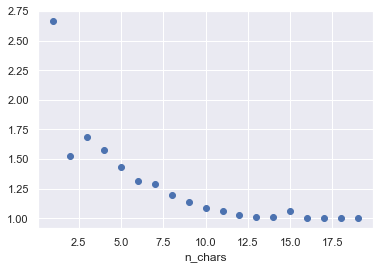

In [57]:
VOCAB.groupby('n_chars').n_pos.mean()\
    .sort_values(ascending=False).plot(style='o');

In [58]:
VOCAB[VOCAB.stop == True].sort_values('n_pos', ascending=False)[['n_pos','cat_pos']].head(15)

,n_pos,cat_pos
term_str,,
the,6,"{n1, pno, d, po, pn, acp-p}"
t,6,"{acp-cs, vm2, vvz|pn, d, pn, sy}"
but,6,"{acp-av, xx, acp-p, acp-cc, av, cc}"
a,5,"{n1, d, pns, acp-p, av}"
s,5,"{vvz, pno, po, av, vmb}"
and,5,"{cs, vvz, d, acp-p, cc}"
as,4,"{vvz, acp-av, acp-cs, acp-p}"
no,4,"{uh-x, xx, av-x_d, d-x}"
down,4,"{n1, acp-av, av_j, av}"


# Save

In [59]:
LIB.to_csv(f'{data_home}/folger-LIB2.csv')
VOCAB.to_csv(f'{data_home}/folger-VOCAB.csv')
CORPUS.to_csv(f'{data_home}/folger-CORPUS.csv')
TOKEN.to_csv(f'{data_home}/folger-TOKEN2.csv')